# Indroduction  
The objective of our Modeling is to create an Image Classification model to predict Bird Species. In the given dataset there are image of 400 bird species and each image have size of (224, 224, 3)

**Import Library**

In [ ]:
# General Library
! pip install opendatasets   
import opendatasets as od
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import math
import cv2
from scipy import signal

# Deep Learming Library
import torch
import torchvision
import tarfile
import torch.nn.functional as F
import torchvision.transforms as tt
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid

import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, BatchNormalization, Activation, MaxPool2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Load the Dataset**

In [ ]:
# loading dataset from Kaggle API
dataset_url = 'https://www.kaggle.com/gpiosenka/100-bird-species/download'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surendra01
Your Kaggle Key: ··········


100%|██████████| 1.49G/1.49G [00:26<00:00, 61.5MB/s]


In [ ]:
print(os.listdir('.'))

['.config', '100-bird-species', 'sample_data']


In [ ]:
# loook at the bird species data directory
data_dir = "./100-bird-species"
print(os.listdir(data_dir))

['EfficientNetB4-BIRDS-0.99.h5', 'birds.csv', 'my_csv-2-17-2022-1-17-48.csv', 'valid', 'train', 'test', 'images to test', 'birds latin names.csv', 'class_dict.csv']


In [ ]:
classes = os.listdir(data_dir +  '/train')
print("Number of Species in the dataset: ", len(classes))
print(classes)

Number of Species in the dataset:  400
['MALEO', 'RED FODY', 'EARED PITA', 'PINK ROBIN', 'HARLEQUIN DUCK', 'HARPY EAGLE', 'JANDAYA PARAKEET', 'DARK EYED JUNCO', 'IWI', 'CACTUS WREN', 'CEDAR WAXWING', 'TOWNSENDS WARBLER', 'EUROPEAN GOLDFINCH', 'PEREGRINE FALCON', 'BROWN NOODY', 'HOUSE FINCH', 'RED BEARDED BEE EATER', 'RUFUOS MOTMOT', 'CUBAN TODY', 'FIRE TAILLED MYZORNIS', 'BALI STARLING', 'CURL CRESTED ARACURI', 'GREAT KISKADEE', 'GRAY KINGBIRD', 'GREAT POTOO', 'GILDED FLICKER', 'MYNA', 'CRESTED FIREBACK', 'RAINBOW LORIKEET', 'PYGMY KINGFISHER', 'FIORDLAND PENGUIN', 'BEARDED BARBET', 'NORTHERN GANNET', 'SNOWY EGRET', 'LITTLE AUK', 'SWINHOES PHEASANT', 'BIRD OF PARADISE', 'NORTHERN PARULA', 'SANDHILL CRANE', 'BANDED BROADBILL', 'ALTAMIRA YELLOWTHROAT', 'TASMANIAN HEN', 'RED TAILED THRUSH', 'CALIFORNIA CONDOR', 'BORNEAN BRISTLEHEAD', 'PURPLE MARTIN', 'BLUE HERON', 'GUINEA TURACO', 'BALD IBIS', 'ASHY THRUSHBIRD', 'ALBERTS TOWHEE', 'GOLDEN CHLOROPHONIA', 'DOUBLE EYED FIG PARROT', 'OYSTER CA

Let's look inside a couple of folders, one from the training set and another from the test set. As an analytic exploration, I can also verify the number of images for each class in the training set as well as in the test set.

In [ ]:
SORA_files = os.listdir(data_dir + '/train/SORA')
print('No. of training examples for SORA:', len(SORA_files))
print(SORA_files[:10])

No. of training examples for SORA: 200
['119.jpg', '151.jpg', '178.jpg', '120.jpg', '167.jpg', '070.jpg', '126.jpg', '088.jpg', '193.jpg', '121.jpg']


In [ ]:
IVORY_GULL_files = os.listdir(data_dir + '/train/IVORY GULL')
print('No. of training examples for IVORY GULL:', len(IVORY_GULL_files))
print(IVORY_GULL_files[:10])

No. of training examples for IVORY GULL: 156
['119.jpg', '151.jpg', '120.jpg', '070.jpg', '126.jpg', '088.jpg', '121.jpg', '002.jpg', '122.jpg', '031.jpg']


In [ ]:
baldEagle_test_files = os.listdir(data_dir + "/test/BALD EAGLE")
print("No. of test examples for bald eagle:", len(baldEagle_test_files))
print(baldEagle_test_files[:5])

No. of test examples for bald eagle: 5
['1.jpg', '4.jpg', '2.jpg', '5.jpg', '3.jpg']


In [ ]:
WOOD_DUCK_test_files = os.listdir(data_dir + "/test/WOOD DUCK")
print("No. of test examples for WOOD DUCK:", len(WOOD_DUCK_test_files))
print(WOOD_DUCK_test_files[:5])

No. of test examples for WOOD DUCK: 5
['1.jpg', '4.jpg', '2.jpg', '5.jpg', '3.jpg']


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Exploraing the Dataset

In [ ]:
for cls in classes:
  train_images = os.listdir(data_dir + '/train/' + cls)
  img_count = len(train_images)
  print("Number of image belong to {} is {}".format(cls, img_count))

Number of image belong to MALEO is 120
Number of image belong to RED FODY is 167
Number of image belong to EARED PITA is 125
Number of image belong to PINK ROBIN is 128
Number of image belong to HARLEQUIN DUCK is 151
Number of image belong to HARPY EAGLE is 175
Number of image belong to JANDAYA PARAKEET is 162
Number of image belong to DARK EYED JUNCO is 203
Number of image belong to IWI is 146
Number of image belong to CACTUS WREN is 122
Number of image belong to CEDAR WAXWING is 180
Number of image belong to TOWNSENDS WARBLER is 165
Number of image belong to EUROPEAN GOLDFINCH is 135
Number of image belong to PEREGRINE FALCON is 126
Number of image belong to BROWN NOODY is 129
Number of image belong to HOUSE FINCH is 249
Number of image belong to RED BEARDED BEE EATER is 197
Number of image belong to RUFUOS MOTMOT is 189
Number of image belong to CUBAN TODY is 122
Number of image belong to FIRE TAILLED MYZORNIS is 150
Number of image belong to BALI STARLING is 132
Number of image bel

**Inferece**: In the training data there is around 100 to 200 image for each species.

**Dataset Directory Assignment**

In [ ]:
# making the directiry for train , valid, test 
data_dir = './100-bird-species'
train_directory = data_dir + '/train'
valid_directory = data_dir + '/valid'
test_directory = data_dir + '/test'

**Image Rescaling**  
In this we will  recale the image pixel from 0-255 to 0-1 by using normalize scaling technique.  
In this way, the numbers will be small and the computation becomes easier and faster.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

Image Reading Using the flow from directory function

In [ ]:
train_generator = train_datagen.flow_from_directory(train_directory,
                                                    target_size = (224, 224),  # size of image
                                                    color_mode = 'rgb',
                                                    batch_size = 256,  # ek one go there will br 256 image will be pass
                                                    class_mode = 'sparse')

valid_generator = valid_datagen.flow_from_directory(valid_directory, 
                                                    target_size = (224, 224),
                                                    color_mode = 'rgb',
                                                    batch_size = 256,
                                                    class_mode = 'sparse')

test_generator = test_datagen.flow_from_directory(test_directory, 
                                                    target_size = (224, 224),
                                                    color_mode = 'rgb',
                                                    batch_size = 256,
                                                    class_mode = 'sparse')

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


**Building Dictionary of Bird Species Classes**

In [ ]:
# get to know about the indices of bird Species
num_classes = len(train_generator.class_indices)
print(num_classes)

400


In [ ]:
train_generator.class_indices

**Data Insight Through Plotting Distribution Graphs**

In [ ]:
breeds = list(train_generator.class_indices.keys())   # take the name of breed 

In [ ]:
x = list(train_generator.classes)

In [ ]:
label = []
for i  in range(0, num_classes):
      label.append(x.count(i))

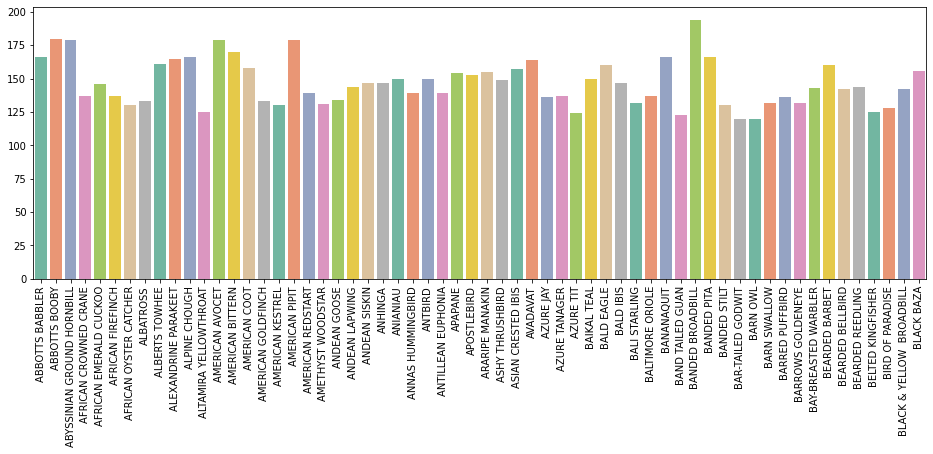

In [ ]:
plt.figure(figsize = (16,5))
sns.barplot(x = breeds[:60], y = label[:60], palette = 'Set2')
plt.xticks(rotation = 90)   # rotate the x axis name to vertical 
plt.show()

**Look at some random image of bird**

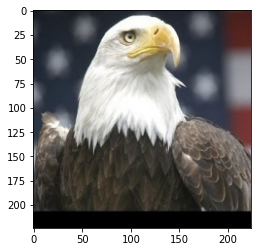

In [ ]:
image1 = np.array(Image.open('./100-bird-species/train/BALD EAGLE/122.jpg'))
plt.imshow(image1, cmap='gray')

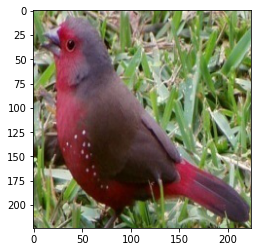

In [ ]:
image2 = np.array(Image.open('./100-bird-species/train/AFRICAN FIREFINCH/005.jpg'))
plt.imshow(image2)

In [ ]:
np.array(image2).shape
#(224, 224) is  size image and 3 show about image is format of RGB 

(224, 224, 3)

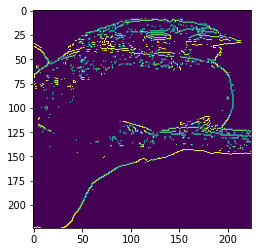

In [ ]:
image2_1 = np.array(Image.open('./100-bird-species/train/AFRICAN FIREFINCH/002.jpg'))  
image2_1 = cv2.Canny(image2_1,224,224)    # cv2 canny is used to detect the edge of an image
plt.imshow(image2_1);

I create training and validation datasets using the ImageFolder class from torchvision. In addition to the ToTensor transform, I also apply some other transforms to the images. The following changes are a few improvement changes I make while creating PyTorch datasets for training and validation:

1) **Channel-wise data normalization**  
--> We take (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) as first one is for mean which is 0.5 and another for S.D 0.5 and these are three time because we have RGB as three layer. now range change from 0, 1 to -1 to 1 like minimum walo was 0 now it became (0 - 0.5/0.5) = -1.   



2) **Randomized data augmentations**  
when dataset is small ir we have to train the model better then we do augmention, in ths we rotate the image, increase or descrease the brightness, change the position of object in image. 

In [ ]:
image_size = 32

In [ ]:

# Data transforms (normalization & data augmentation) # tt.RandomCrop(64, padding=4, padding_mode='reflect')
stats = ((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
train_tfms = tt.Compose([tt.Resize((image_size, image_size)),
                         tt.RandomCrop(image_size, padding=4, padding_mode='reflect'),
                         #tt.Resize(image_size),
                         #tt.CenterCrop(image_size), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((image_size, image_size)), tt.ToTensor(), tt.Normalize(*stats)])

test_tfms = tt.Compose([tt.Resize((image_size, image_size)), tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
# PyTorch Training & Validation & Test Datasets
train_ds = ImageFolder(data_dir+'/train', train_tfms)
valid_ds = ImageFolder(data_dir+'/valid', valid_tfms)
test_ds = ImageFolder(data_dir+'/test', test_tfms)

Next, we can create data loaders for retrieving images in batches. I will use a relatively large batch size of 400 to utlize a larger portion of the GPU RAM. The, I try reducing the batch size & restarting the kernel if I face an "out of memory" error.

In [ ]:
batch_size = 400  # number if image pass in one epoch


In [ ]:
# pytorch training & validation & test Loaders
train_dl = DataLoader(train_ds, batch_size= batch_size, shuffle = True, num_workers = 2, pin_memory = True)
valid_dl = DataLoader(valid_ds, batch_size = batch_size*2, num_workers = 2, pin_memory = True)
test_dl = DataLoader(test_ds, batch_size = batch_size*2, num_workers = 2, pin_memory = True)


Let's take a look at some sample images from the training dataloader. To display the images, I need to denormalize the pixels values to bring them back into the range (0,1).

In [ ]:
def denormalize(images, means, stds):
  means = torch.tensor(means).reshape(1,3,1,1)
  stds = torch.tensor(stds).reshape(1,3,1,1)
  return images*stds + means

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denormalize(images, *stats)
    ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
    break

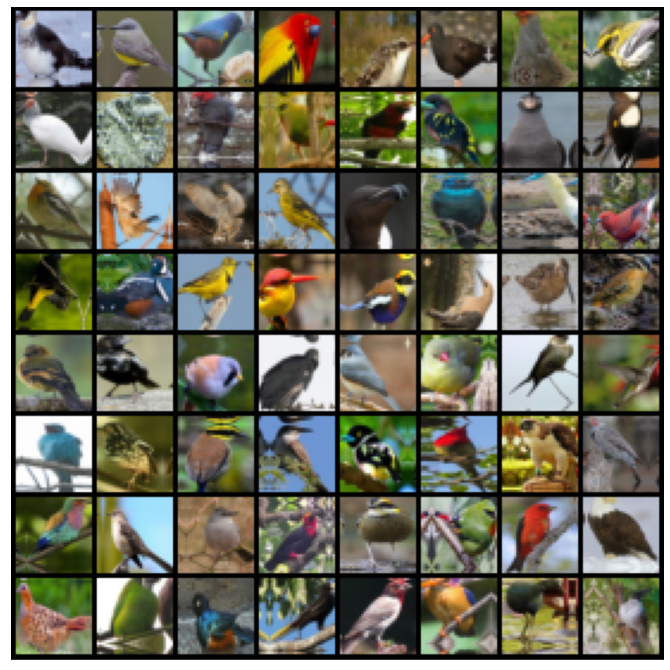

In [ ]:
show_batch(train_dl)

The colors seem out of place because of the normalization. Note that normalization is also applied during inference. When looking closely, I can spot the cropping and reflection padding in some of the images. Horizontal flip is a bit difficult to detect from visual inspection.

Utilizing GPU  
o seamlessly use a GPU, if one is available, I define a couple of helper functions (get_default_device & to_device) besides a helper class DeviceDataLoader to move my model & data to the GPU as required.

In [ ]:
# helper function to check the if gpu avaiable or not
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  # move tensor to choosen device
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return device.to(device, non_blocking = True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)


In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


Based on where this notebook is being run, the default device could be a CPU (torch.device('cpu')) or a GPU (torch.device('cuda'))

In [ ]:
device = get_default_device()

I wrap my training and validation data loaders using DeviceDataLoader for automatically transferring batches of data to the GPU (if available).

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

## **ResNet Model**  

ResNets tackle the issue of performance degradation, vanishing  and exploding gradient associated with the deep neural networks as they go deeper into the network.  

**Residual block**  
A residual block is a stack of layers set in such a way that the output of a layer is taken and added to another layer deeper in the block. The non-linearity is then applied after adding it together with the output of the corresponding layer in the main path.  
presence of residual block prevent the loss of performance whenever the activation function tend to vanish or explode


## Model with Residual Blocks and Batch Normalization

In [ ]:
import torch
import torch.nn as nn


class SimpleResidualBlock(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, padding = 1, stride = 1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 1, padding = 1, stride = 1)
    self.relu2 = nn.ReLU()

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(out)
    return self.relu2(out) + x          ## ReLU can be applied before or after adding the input

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),   # this will apply in all the conv layer, this arct of each layer
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)                   # batch_size * [64 * 32 *32]
        self.conv2 = conv_block(64, 128, pool=True)                 # batch_size * [128 * 16 * 16]
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))               # batch_size * [128 * 16 * 16]
        
        self.conv3 = conv_block(128, 256, pool=True)                             # batch_size * [256 * 8 * 8]
        self.conv4 = conv_block(256, 512, pool=True)                           # batch_size * [512 * 4 * 4]
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))               # batch_size * [512 * 4 * 4]
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),                 # batch_size * [512 * 1 * 1]
                                        nn.Flatten()                     , # batch_size * [512]
                                        nn.Dropout(0.2),                # (0.2*batch_size) * [512]
                                        nn.Linear(512, num_classes))           # (0.2*batch_size) * [3]
        
    def forward(self, xb):    # we make CNN of 4 conv, 2 residual
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 400), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Model Training


In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before I begin training, I evaluate the instantiated model in order to see how it performs on the validation set with the initial set of parameters.

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 5.992999076843262, 'val_acc': 0.0020833334419876337}]

**Inference:**  We get the accuracy of jsut 0.2% and got the loss of 6%



In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   26490 KB |    3935 MB |   19637 MB |   19611 MB |\n|       from large pool |   24192 KB |    3933 MB |   19633 MB |   19609 MB |\n|       from small pool |    2298 KB |       3 MB |       4 MB |       2 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |   26490 KB |    3935 MB |   19637 MB |   19611 MB |\n|       from large pool |   24192 KB |    3933 MB |

In [ ]:
epochs = 10    # epach means whole dataset will be given 10 times
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam  

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, grad_clip = grad_clip,
                         weight_decay = weight_decay,
                         opt_func = opt_func)

Epoch [0], last_lr: 0.00278, train_loss: 5.3970, val_loss: 4.3326, val_acc: 0.1325
Epoch [1], last_lr: 0.00759, train_loss: 3.8149, val_loss: 2.9432, val_acc: 0.3375
Epoch [2], last_lr: 0.01000, train_loss: 2.5924, val_loss: 1.6427, val_acc: 0.5808
Epoch [3], last_lr: 0.00950, train_loss: 1.8616, val_loss: 1.4853, val_acc: 0.6225
Epoch [4], last_lr: 0.00812, train_loss: 1.4904, val_loss: 1.0508, val_acc: 0.7258
Epoch [5], last_lr: 0.00611, train_loss: 1.2131, val_loss: 0.8364, val_acc: 0.7825
Epoch [6], last_lr: 0.00389, train_loss: 0.9676, val_loss: 0.5953, val_acc: 0.8413
Epoch [7], last_lr: 0.00188, train_loss: 0.7487, val_loss: 0.4405, val_acc: 0.8808
Epoch [8], last_lr: 0.00050, train_loss: 0.5450, val_loss: 0.3361, val_acc: 0.9113
Epoch [9], last_lr: 0.00000, train_loss: 0.4276, val_loss: 0.3218, val_acc: 0.9121
CPU times: user 44.5 s, sys: 12.6 s, total: 57.1 s
Wall time: 16min 59s


we get the accuracy of 91% which is really good

## Model Accuracy and Loss Plot  
We will plot to see how the ResNet perform

In [ ]:
from matplotlib import spines
from matplotlib import axes

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


plt.rc_context({'axes.edgecolor':'orange', 
                'xtick.color':'red',   #  color is x axis label
                'ytick.color':'green',   
                'figure.facecolor':'white'})

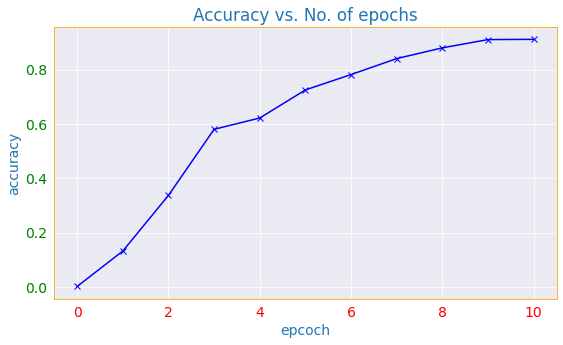

In [ ]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-bx')
  plt.xlabel('epcoch', color = 'C0')
  plt.ylabel('accuracy', color = 'C0')
  plt.title('Accuracy vs. No. of epochs', color='C0');

plot_accuracies(history)

**Infernce:** It can be seen that after 8 epoch the accuracy became saturated and after that there is not much increase in accuracy. so it can said that 9 ot 10 epoch will be optimal

plot the Model Training and Validation Losses to investigate the training trend further down the improvement path.

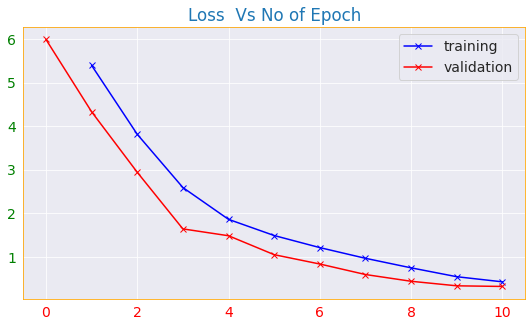

In [ ]:
def plot_losses(history):
  train_losses = [x.get('train_loss') for x in history]
  val_losses = [x['val_loss'] for x in history]
  plt.plot(train_losses, '-bx')
  plt.plot(val_losses, '-rx')
  plt.legend(['training', 'validation'])
  plt.title('Loss  Vs No of Epoch', color = 'C0')

plot_losses(history);

**Inference:** It can be clearly seen  that ResNet model is trained very well and there is no case of over fitting , with decrease of loss in training along with validation.

## Record Experiment Model Performance on Test Dataset 
Finally, I evaluate the model on the Test Dataset of 400 Bird Species and report its final performance in each experiment for record.


In [ ]:
evaluate(model, test_dl)

{'val_loss': 0.2203698754310608, 'val_acc': 0.9424999356269836}

## Testing with individual Test Datasets images


In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: ABBOTTS BABBLER predicted: HAMMERKOP


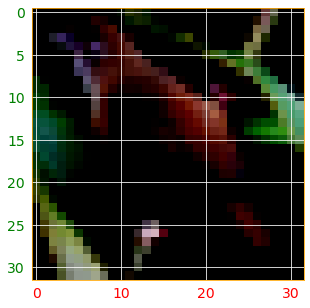

In [ ]:
# test image with Clamping
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], 'predicted:' , predict_image(img, model))

Label: CUBAN TODY , Predicted: CUBAN TODY


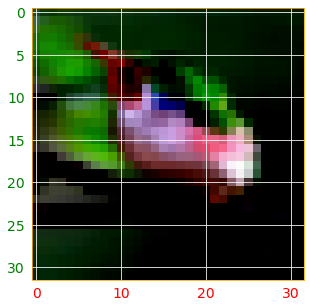

In [ ]:
# Image Test#2 (With Clamping)
img, label = test_ds[707]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: KAKAPO , Predicted: KAKAPO


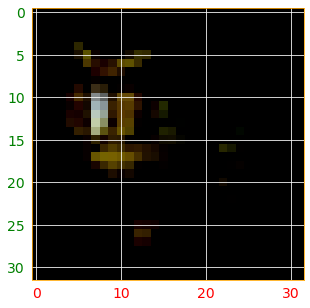

In [ ]:
# Image Test#3 (With Clamping)
img, label = test_ds[1222]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: GREEN JAY , Predicted: GREEN JAY


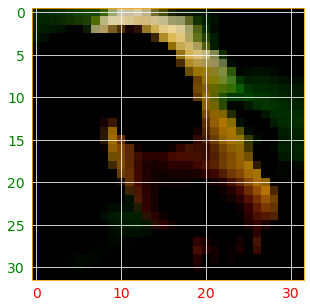

In [ ]:
# Image Test#4 (Withour Clamping)
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
img, label = test_ds[999]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model))

## Save, Commit and Recoding Experiment Results


In [ ]:
torch.save(model.state_dict(), '400BirdSpecies-resnet9.pth')


The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, I redefine the model with the same structure, and use the .load_state_dict method.

In [ ]:
model.state_dict()

OrderedDict([('conv1.0.weight',
              tensor([[[[-6.8978e-02, -2.5138e-01, -3.5853e-01],
                        [-1.2760e-01,  1.3909e-02, -6.6602e-02],
                        [ 5.9972e-02,  5.7114e-02, -1.9297e-01]],
              
                       [[ 3.2828e-02, -5.7845e-02, -9.4097e-02],
                        [ 3.4429e-01,  4.0141e-01, -1.3851e-02],
                        [ 1.3210e-01,  1.6849e-01, -6.9640e-02]],
              
                       [[-1.0595e-01,  9.5785e-02, -6.2377e-02],
                        [ 3.8230e-01,  1.7665e-01, -5.1708e-02],
                        [ 1.2087e-01,  1.4128e-01, -4.0181e-01]]],
              
              
                      [[[-8.1696e-02, -7.0863e-02,  2.7003e-01],
                        [-1.9356e-01, -2.5524e-01,  7.6311e-02],
                        [-1.1059e-01, -2.4647e-01, -1.1507e-01]],
              
                       [[ 1.0157e-05,  5.3291e-03, -8.4445e-02],
                        [ 3.6514e-01,  1.12

In [ ]:
model_load = to_device(ResNet9(3, 400), device)


To load the model weights, I instante a new object of the class ResNet9(ImageClassificationBase), and use the .load_state_dict method.

In [ ]:
model_load.state_dict()


OrderedDict([('conv1.0.weight', tensor([[[[-0.1576, -0.0010, -0.1265],
                        [ 0.1575, -0.1780,  0.1864],
                        [ 0.0286, -0.0446, -0.1257]],
              
                       [[-0.1243,  0.1442, -0.1880],
                        [ 0.1739,  0.1226, -0.0695],
                        [-0.0073, -0.0668,  0.0594]],
              
                       [[-0.1045, -0.0290, -0.1584],
                        [ 0.0530,  0.1705,  0.0846],
                        [ 0.0689, -0.1133,  0.0719]]],
              
              
                      [[[ 0.0068,  0.1606,  0.1090],
                        [-0.0712, -0.0958, -0.1295],
                        [-0.1242,  0.1111, -0.1673]],
              
                       [[-0.0509,  0.0215,  0.0606],
                        [ 0.0134, -0.1917, -0.1786],
                        [-0.1726, -0.1777, -0.1631]],
              
                       [[-0.0904, -0.1413,  0.1831],
                        [ 0.0209, -0.0

In [ ]:
model_load.load_state_dict(torch.load('400BirdSpecies-resnet9.pth'))

<All keys matched successfully>

In [ ]:
model.state_dict()


OrderedDict([('conv1.0.weight',
              tensor([[[[-6.8978e-02, -2.5138e-01, -3.5853e-01],
                        [-1.2760e-01,  1.3909e-02, -6.6602e-02],
                        [ 5.9972e-02,  5.7114e-02, -1.9297e-01]],
              
                       [[ 3.2828e-02, -5.7845e-02, -9.4097e-02],
                        [ 3.4429e-01,  4.0141e-01, -1.3851e-02],
                        [ 1.3210e-01,  1.6849e-01, -6.9640e-02]],
              
                       [[-1.0595e-01,  9.5785e-02, -6.2377e-02],
                        [ 3.8230e-01,  1.7665e-01, -5.1708e-02],
                        [ 1.2087e-01,  1.4128e-01, -4.0181e-01]]],
              
              
                      [[[-8.1696e-02, -7.0863e-02,  2.7003e-01],
                        [-1.9356e-01, -2.5524e-01,  7.6311e-02],
                        [-1.1059e-01, -2.4647e-01, -1.1507e-01]],
              
                       [[ 1.0157e-05,  5.3291e-03, -8.4445e-02],
                        [ 3.6514e-01,  1.12

In [ ]:
evaluate(model_load, test_dl)


{'val_loss': 0.2203698754310608, 'val_acc': 0.9424999356269836}